In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Membaca dataset

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv('hotel_bookings.csv')

In [39]:
# Menampilkan head dari dataset

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Memerika dimensi data

print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

# Menampilkan nama kolom dan tipe data

print(df.dtypes)

Jumlah baris: 119390, Jumlah kolom: 32
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       ob

In [5]:
# Mengubah tipe data children, agent, company

df['children'] = df['children'].astype('Int64')
df['agent'] = df['agent'].astype('Int64')
df['company'] = df['company'].astype('Int64')

In [6]:
# Statistik deskriptif untuk variabel numerik

print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [7]:
# Menghitung value_counts untuk kolom days_in_waiting_list
value_counts = df.groupby('is_canceled')['days_in_waiting_list'].value_counts()

print("\nValue counts for both columns:")
print(value_counts)


Value counts for both columns:
is_canceled  days_in_waiting_list
0            0                       73827
             58                        164
             87                         76
             122                        53
             63                         51
             38                         47
             176                        39
             77                         37
             223                        36
             65                         35
             48                         33
             50                         31
             98                         30
             33                         29
             44                         29
             236                        29
             15                         25
             96                         25
             178                        25
             27                         23
             47                         23
             56                

In [8]:
# Distribusi frekuensi untuk variabel kategorikal

for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
JPN      197
CZE      171
IND      152
KOR      133
GRC      128
DZA      103
SRB      101
HRV      100
MEX       85
EST       

In [9]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    print(f"Skewness (Kemencengan) untuk kolom '{column}': {skewness}")
    print(f"Kurtosis untuk kolom '{column}': {kurtosis}")
    print("-" * 40)

Skewness (Kemencengan) untuk kolom 'is_canceled': 0.5366783893964283
Kurtosis untuk kolom 'is_canceled': -1.7120049858378619
----------------------------------------
Skewness (Kemencengan) untuk kolom 'lead_time': 1.3465498727254268
Kurtosis untuk kolom 'lead_time': 1.6964488485585467
----------------------------------------
Skewness (Kemencengan) untuk kolom 'arrival_date_year': -0.2325832518127746
Kurtosis untuk kolom 'arrival_date_year': -0.9945637526390856
----------------------------------------
Skewness (Kemencengan) untuk kolom 'arrival_date_week_number': -0.010014326041540811
Kurtosis untuk kolom 'arrival_date_week_number': -0.9860771763295451
----------------------------------------
Skewness (Kemencengan) untuk kolom 'arrival_date_day_of_month': -0.0020004539786149557
Kurtosis untuk kolom 'arrival_date_day_of_month': -1.1871683187282633
----------------------------------------
Skewness (Kemencengan) untuk kolom 'stays_in_weekend_nights': 1.3800464497062852
Kurtosis untuk kolom

In [10]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


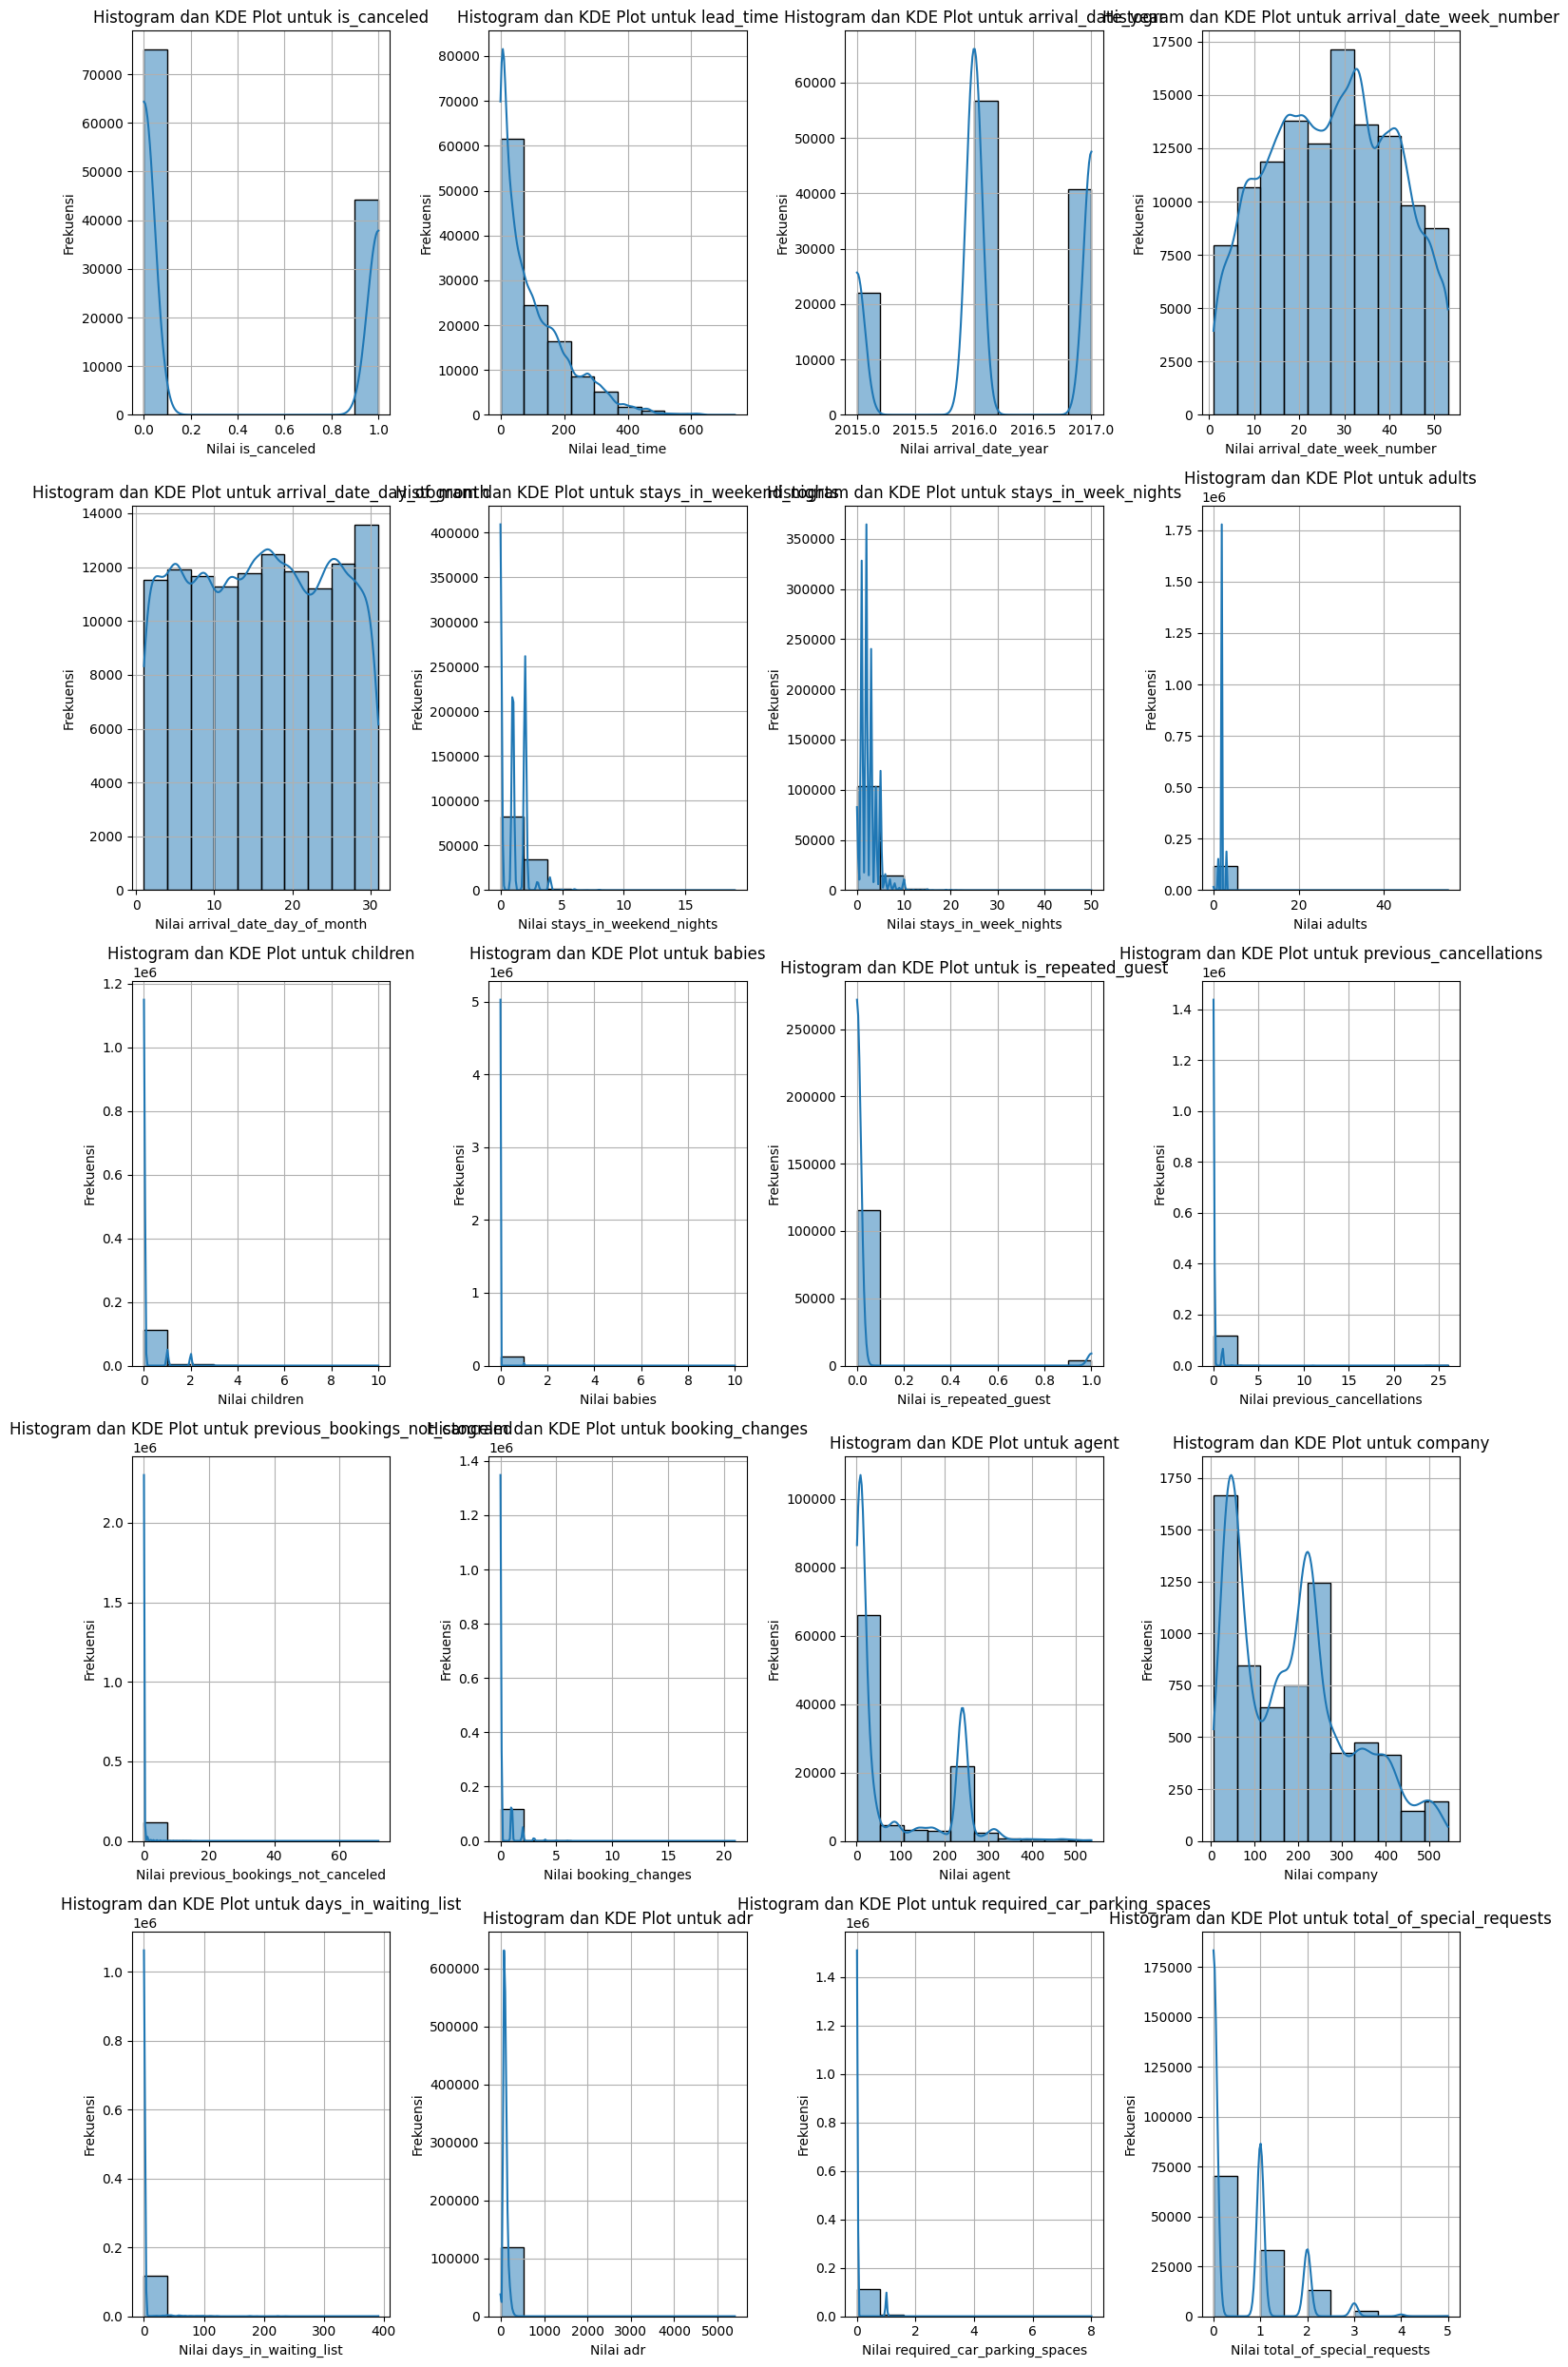

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan jumlah kolom dan baris untuk layout
num_cols = 4  # jumlah kolom dalam satu baris
num_rows = int(np.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_cols))  # menghitung jumlah baris

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Meratakan array axes agar lebih mudah diakses
axes = axes.flatten()

# Loop untuk semua kolom numerik
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    ax = axes[i]  # memilih axis untuk subplot
    sns.histplot(df[column], kde=True, bins=10, ax=ax)
    ax.set_title(f'Histogram dan KDE Plot untuk {column}')
    ax.set_xlabel(f'Nilai {column}')
    ax.set_ylabel('Frekuensi')
    ax.grid(True)

# Menghapus subplot yang tidak digunakan jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()


In [12]:
# Cek Missing Values

df.isnull().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [13]:
# Mengubah kolom 'country' yang null menjadi modus
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [14]:
# Melakukan drop kolom 'company' dan kolom NA
df = df.drop('company', axis=1)
df = df.dropna(subset=['agent'])
df = df.dropna(subset=['children'])

In [15]:
# Cek Missing Values

df.isnull().sum().sort_values(ascending=False).head()

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [16]:
# Drop duplicate

print("Baris sebelum duplicate:", len(df))
df.drop_duplicates(inplace=True)
print("Rows setelah duplicate", len(df))
df.reset_index(drop=True, inplace=True)

Baris sebelum duplicate: 103048
Rows setelah duplicate 75192


In [17]:
# Melakukan drop pada tamu yang 0

zero_guests_df = df.loc[df["adults"]
                   + df["children"]
                   + df["babies"] == 0].index

print(len(zero_guests_df))

# Drop 0 tamu

print("Baris sebelum drop 0 tamu:", len(df))
df.drop(df.index[zero_guests_df], axis=0, inplace=True)
print("Baris setelah drop 0 tamu:", len(df))
df.reset_index(drop=True, inplace=True)

114
Baris sebelum drop 0 tamu: 75192
Baris setelah drop 0 tamu: 75078


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75078 entries, 0 to 75077
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75078 non-null  object 
 1   is_canceled                     75078 non-null  int64  
 2   lead_time                       75078 non-null  int64  
 3   arrival_date_year               75078 non-null  int64  
 4   arrival_date_month              75078 non-null  object 
 5   arrival_date_week_number        75078 non-null  int64  
 6   arrival_date_day_of_month       75078 non-null  int64  
 7   stays_in_weekend_nights         75078 non-null  int64  
 8   stays_in_week_nights            75078 non-null  int64  
 9   adults                          75078 non-null  int64  
 10  children                        75078 non-null  Int64  
 11  babies                          75078 non-null  int64  
 12  meal                            

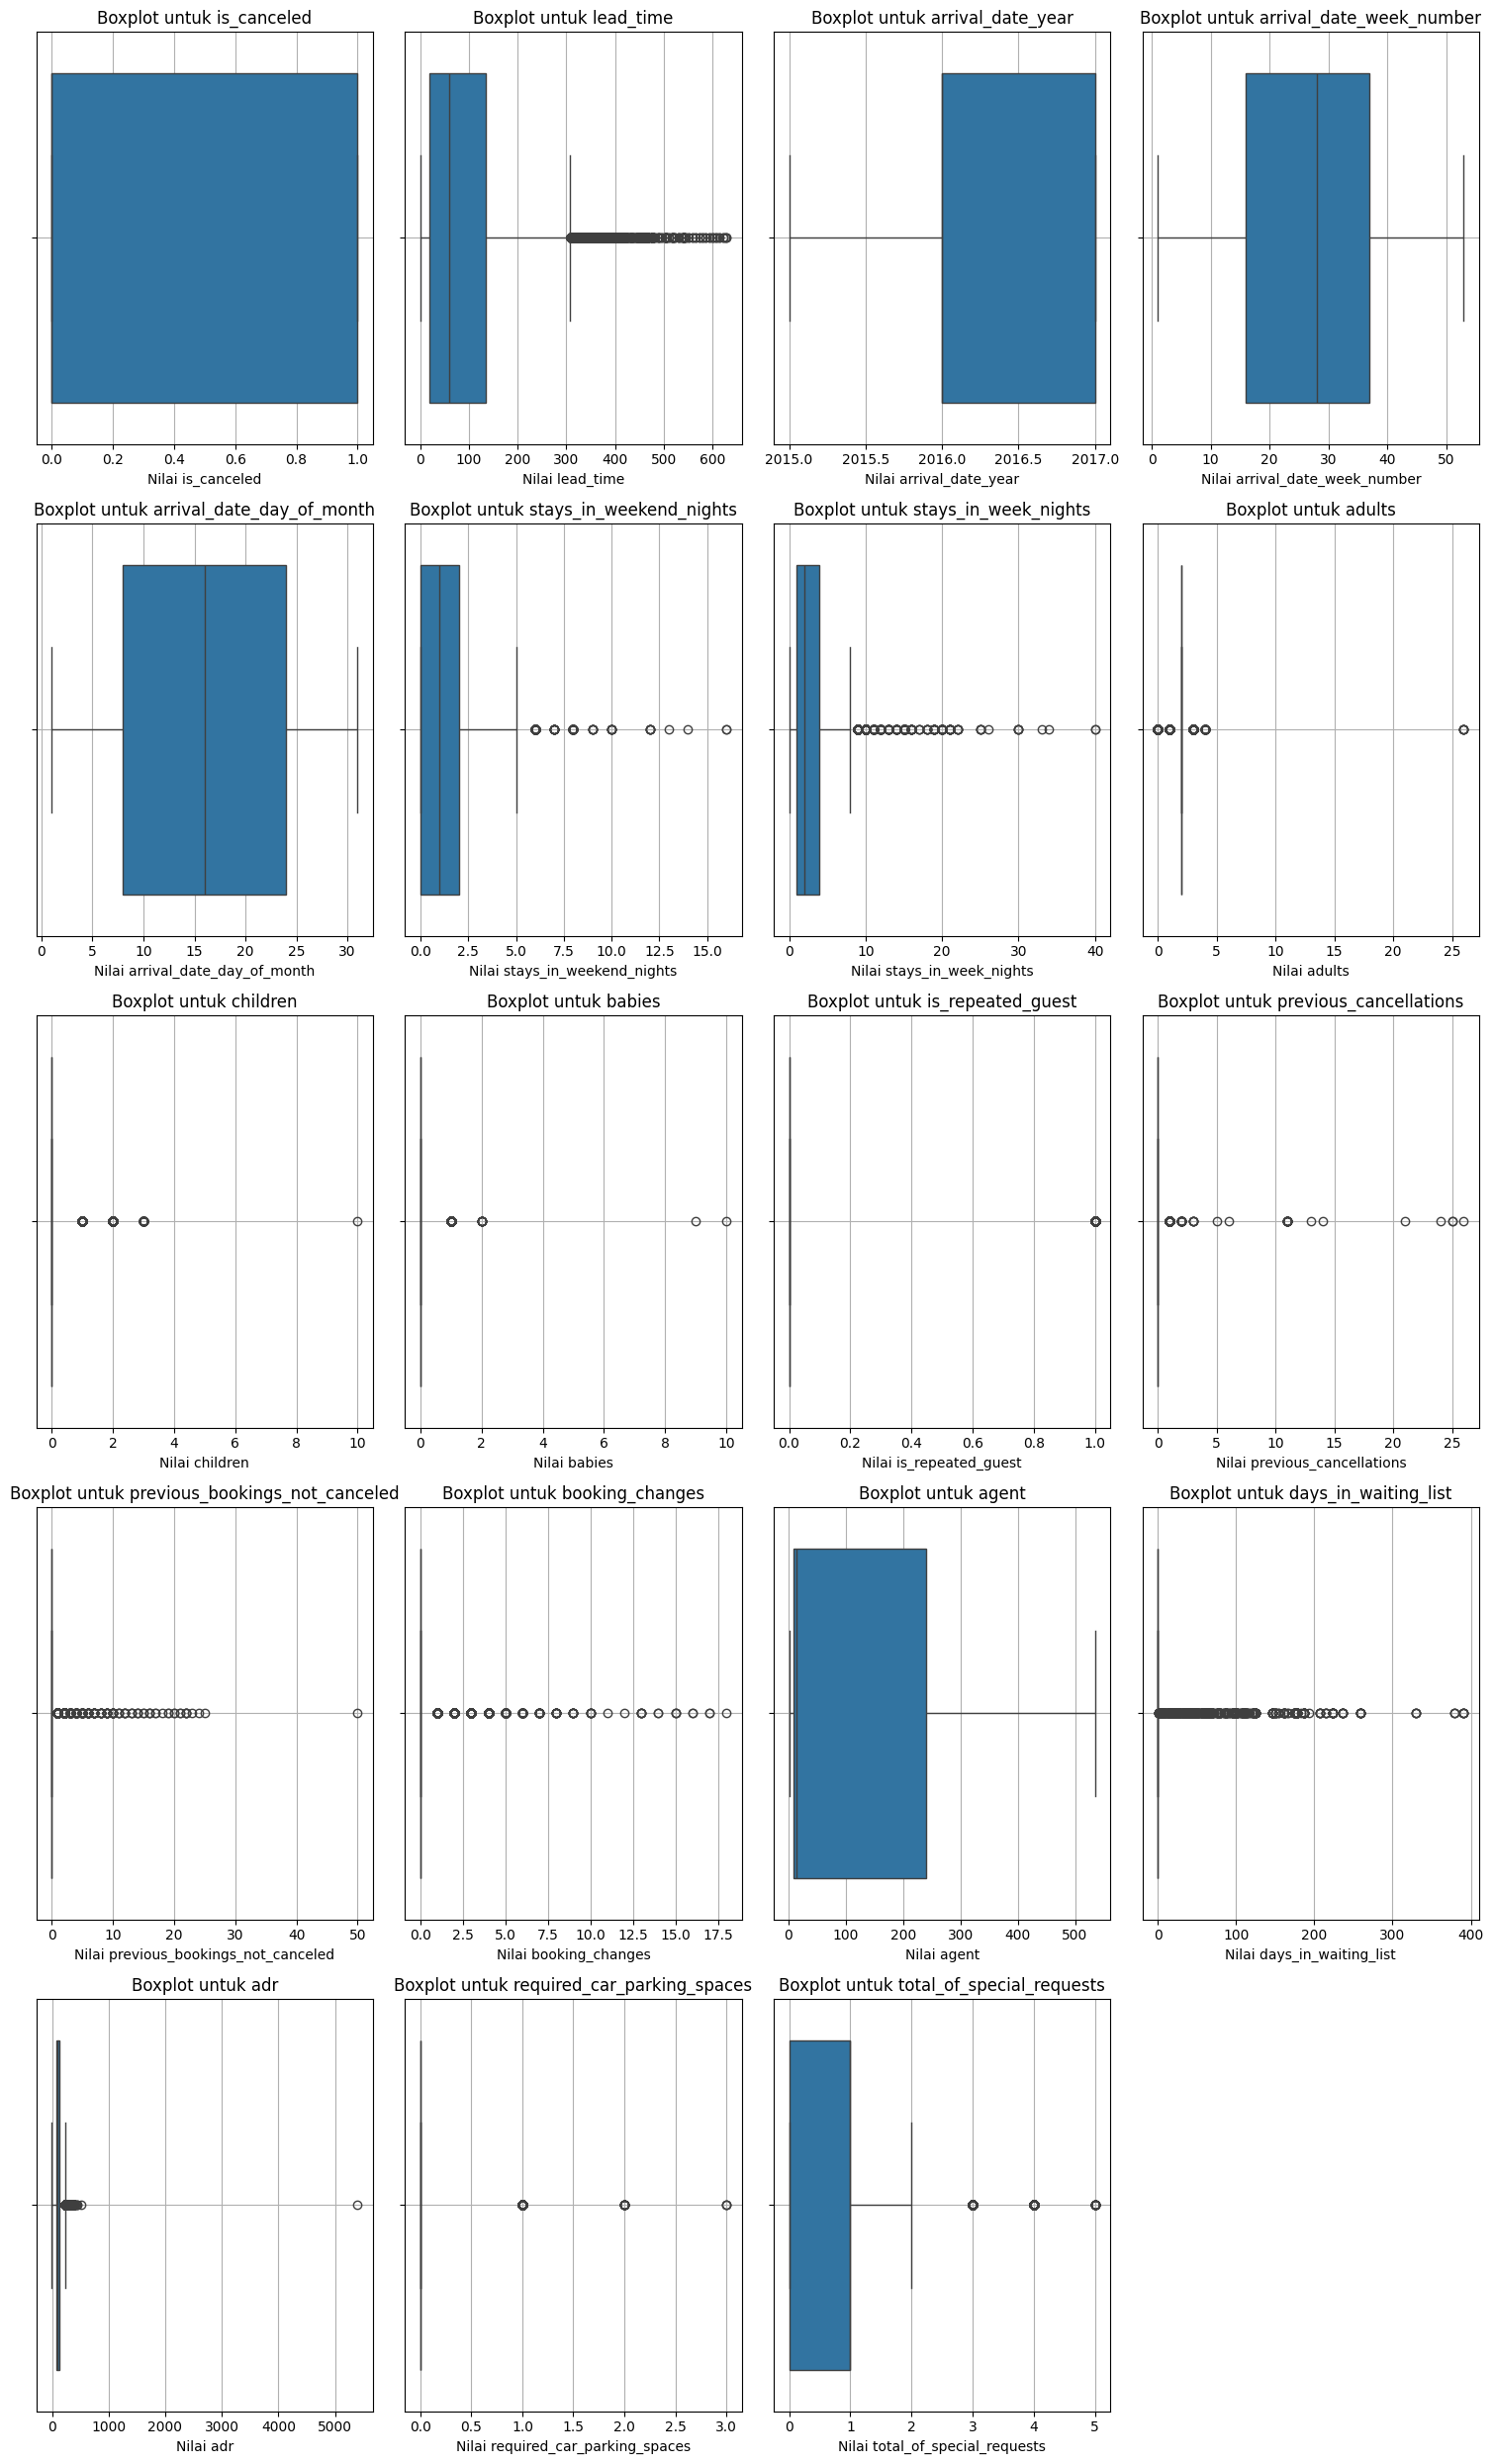

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan jumlah kolom dan baris untuk layout
num_cols = 4  # jumlah kolom dalam satu baris
num_rows = int(np.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_cols))  # menghitung jumlah baris

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Meratakan array axes agar lebih mudah diakses
axes = axes.flatten()

# Loop untuk semua kolom numerik
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    ax = axes[i]  # memilih axis untuk subplot
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot untuk {column}')
    ax.set_xlabel(f'Nilai {column}')
    ax.grid(True)

# Menghapus subplot yang tidak digunakan jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()


In [20]:
# Outlier remover
def remove_outlier(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print()

    # Examine instances before removal
    print("Number of instances before removal: {}".format(len(data)))

    # Remove outliers
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)

    # Examine instances after removal
    print("Number of instances after removal: {}".format(len(data)))
    print()

    return data

In [21]:
# Remove Outlier

df = remove_outlier(df, 'lead_time')
df = remove_outlier(df, 'stays_in_weekend_nights')
df = remove_outlier(df, 'stays_in_week_nights')
df = remove_outlier(df, 'adr')

Quartile 25: 18.0 | Quartile 75: 134.0
IQR: 116.0

Cut Off: 174.0
Lower bound: -156.0
Upper bound: 308.0

Number of instances before removal: 75078
Number of instances after removal: 73311

Quartile 25: 0.0 | Quartile 75: 2.0
IQR: 2.0

Cut Off: 3.0
Lower bound: -3.0
Upper bound: 5.0

Number of instances before removal: 73311
Number of instances after removal: 73130

Quartile 25: 1.0 | Quartile 75: 4.0
IQR: 3.0

Cut Off: 4.5
Lower bound: -3.5
Upper bound: 8.5

Number of instances before removal: 73130
Number of instances after removal: 72039

Quartile 25: 76.5 | Quartile 75: 137.7
IQR: 61.19999999999999

Cut Off: 91.79999999999998
Lower bound: -15.299999999999983
Upper bound: 229.49999999999997

Number of instances before removal: 72039
Number of instances after removal: 69914



In [22]:
# Feature Engineering

In [23]:
# Membuat countries yang banyak menjadi 10 saja dan sisanya others

n_countries = 10
most_freq_countries = df['country'].value_counts()[:n_countries].index
df['country'].value_counts()[:n_countries]

df['country'] = df['country'].apply(lambda x: x if x in most_freq_countries else 'Others')

In [24]:
# Membuat company yang banyak menjadi 10 saja dan sisanya others

n_agents = 10
most_freq_agent = df['agent'].value_counts()[:n_agents].index
df['agent'].value_counts()[:n_agents]

df['agent'] = df['agent'].apply(lambda x: x if x in most_freq_agent else 'Others')

In [25]:
# Definisikan mapping bulan ke kuartal
month_to_quarter = {
    'January': 'Quarter_1',
    'February': 'Quarter_1',
    'March': 'Quarter_1',
    'April': 'Quarter_2',
    'May': 'Quarter_2',
    'June': 'Quarter_2',
    'July': 'Quarter_3',
    'August': 'Quarter_3',
    'September': 'Quarter_3',
    'October': 'Quarter_4',
    'November': 'Quarter_4',
    'December': 'Quarter_4'
}

# Buat kolom baru dengan mapping
df['arrival_date_quarter'] = df['arrival_date_month'].map(month_to_quarter)

In [26]:
# Buat kolom baru 'total_orang' dengan menjumlahkan 'adults', 'children', dan 'babies'
df['total_orang'] = df['adults'] + df['children'] + df['babies']

# Buat kolom baru 'days' dengan menjumlahkan night stays
df['days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Buat kolom rasio lead time special requests
df['lead_time_special_requests_ratio'] = df['lead_time'] / (df['total_of_special_requests'] + 1)

# Buat kolom cancellation ratio
df['cancellation_ratio'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'] + 1)

# Buat kolom guest night interaction
df['guest_night_interaction'] = df['total_orang'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_quarter,total_orang,days,lead_time_special_requests_ratio,cancellation_ratio,guest_night_interaction
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Others,0,Transient,75.0,0,0,Check-Out,2015-07-02,Quarter_3,1,1,13.0,0.0,1
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,Quarter_3,2,2,7.0,0.0,4
2,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,Others,0,Transient,103.0,0,1,Check-Out,2015-07-03,Quarter_3,2,2,4.5,0.0,4
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,82.0,0,1,Canceled,2015-05-06,Quarter_3,2,3,42.5,0.0,6
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,Others,0,Transient,105.5,0,0,Canceled,2015-04-22,Quarter_3,2,3,75.0,0.0,6


In [28]:
# Fungsi untuk mengubah kategori menjadi numerik
def categorical_to_numeric(df_for_matrix):
    for column in df_for_matrix.select_dtypes(include=['object']).columns:
        # Mengambil kategori unik dari kolom
        unique_categories = df_for_matrix[column].unique()
        
        # Membuat dictionary mapping kategori ke angka
        category_map = {category: idx for idx, category in enumerate(unique_categories)}
        
        # Mengubah kolom berdasarkan mapping
        df_for_matrix[column] = df_for_matrix[column].map(category_map)
    
    return df_for_matrix

# Mengubah semua kolom kategorikal menjadi numerik
df_for_matrix = df.copy(deep=True)
df_for_matrix = categorical_to_numeric(df_for_matrix)

In [29]:
df_for_matrix.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_quarter,total_orang,days,lead_time_special_requests_ratio,cancellation_ratio,guest_night_interaction
0,0,0,13,2015,0,27,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75.0,0,0,0,0,0,1,1,13.0,0.0,1
1,0,0,14,2015,0,27,1,0,2,2,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,98.0,0,1,0,1,0,2,2,7.0,0.0,4
2,0,0,9,2015,0,27,1,0,2,2,0,0,1,1,2,2,0,0,0,1,1,0,0,0,0,0,103.0,0,1,0,1,0,2,2,4.5,0.0,4
3,0,1,85,2015,0,27,1,0,3,2,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,82.0,0,1,1,2,0,2,3,42.5,0.0,6
4,0,1,75,2015,0,27,1,0,3,2,0,0,2,1,3,1,0,0,0,2,2,0,0,0,0,0,105.5,0,0,1,3,0,2,3,75.0,0.0,6


In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_quarter,total_orang,days,lead_time_special_requests_ratio,cancellation_ratio,guest_night_interaction
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Others,0,Transient,75.0,0,0,Check-Out,2015-07-02,Quarter_3,1,1,13.0,0.0,1
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,Quarter_3,2,2,7.0,0.0,4
2,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,Others,0,Transient,103.0,0,1,Check-Out,2015-07-03,Quarter_3,2,2,4.5,0.0,4
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,82.0,0,1,Canceled,2015-05-06,Quarter_3,2,3,42.5,0.0,6
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,Others,0,Transient,105.5,0,0,Canceled,2015-04-22,Quarter_3,2,3,75.0,0.0,6


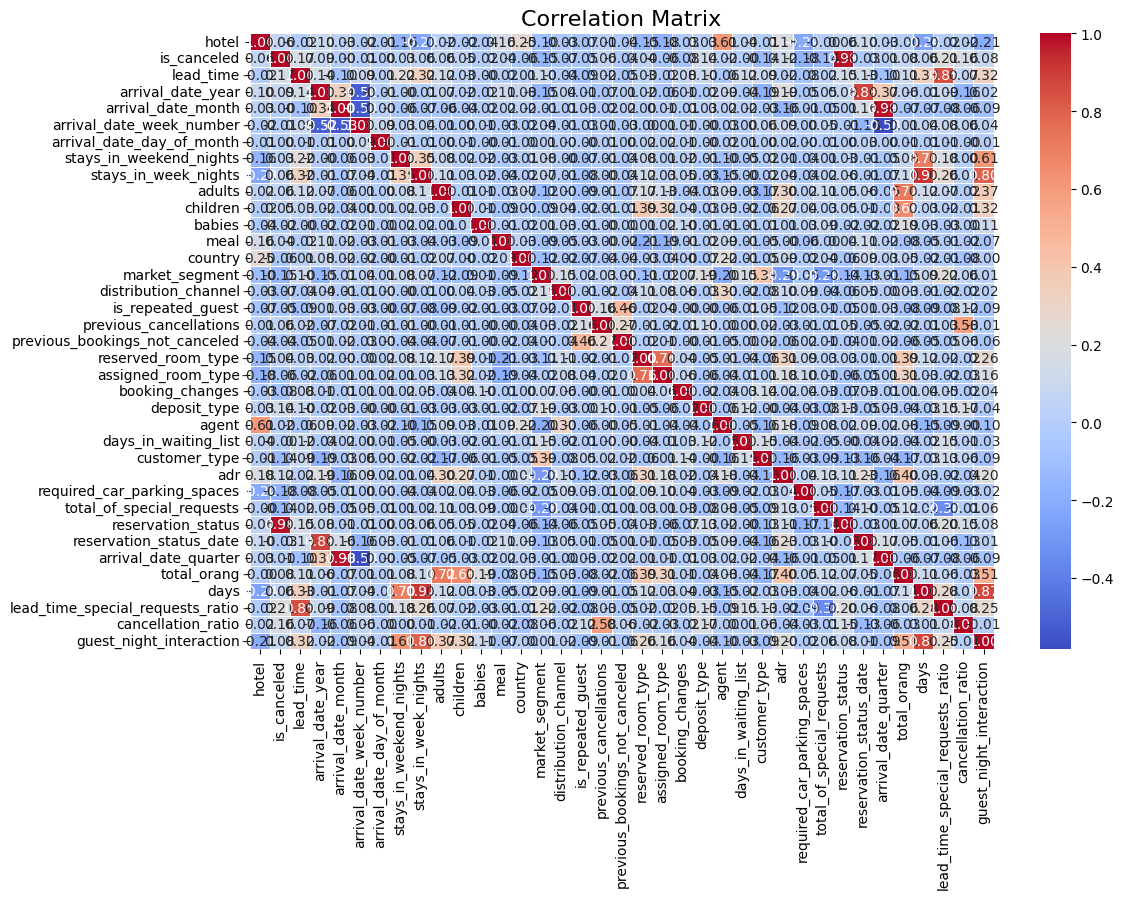

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung correlation matrix
correlation_matrix = df_for_matrix.corr()

# Membuat heatmap untuk correlation matrix
plt.figure(figsize=(12, 8))  # Ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [32]:
# Cek korelasi dengan kolom 'is_canceled'

df_for_matrix.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                         1.000000
reservation_status                  0.977229
lead_time_special_requests_ratio    0.212873
lead_time                           0.168469
cancellation_ratio                  0.162133
deposit_type                        0.138804
adr                                 0.122364
arrival_date_year                   0.086839
guest_night_interaction             0.084857
total_orang                         0.077741
stays_in_week_nights                0.064389
days                                0.062983
adults                              0.062883
hotel                               0.061073
previous_cancellations              0.059429
children                            0.053068
meal                                0.044347
reserved_room_type                  0.035591
stays_in_weekend_nights             0.032081
agent                               0.015466
arrival_date_quarter                0.005814
arrival_date_day_of_month           0.003836
arrival_da

In [33]:
# Melakukan drop untuk data yang tidak bisa dipakai (Data yang sudah terjadi)
df = df.drop('reservation_status', axis=1)
df = df.drop('reservation_status_date', axis=1)
df = df.drop('adr', axis=1)
df = df.drop('assigned_room_type', axis=1)

In [34]:
probabilitas = df['is_canceled'].value_counts(normalize=True)

print(probabilitas)

is_canceled
0    0.709886
1    0.290114
Name: proportion, dtype: float64


In [36]:
df.to_csv('clean_data.csv')